# CSC3831 Final Assessment - Part I: Data Engineering



In [12]:
# Loading in standard packages for analysis, feel free to add an extra packages you'd like to use here
import random
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
from matplotlib import pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

# Loading in the corrupted dataset to be used in analysis and imputation
houses_corrupted_df = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/CORRUPTED/HOUSES/houses_0.1_MAR.csv', header=0)
# Remove an artifact from the dataset
houses_corrupted_df.drop(["Unnamed: 0"], axis=1, inplace=True)
houses_corrupted_df.head()

median_house_value  median_income  housing_median_age  total_rooms  \
0            452600.0         8.3252                41.0        880.0   
1            358500.0         8.3014                21.0       7099.0   
2            352100.0         7.2574                52.0       1467.0   
3            341300.0         5.6431                52.0       1274.0   
4            342200.0         3.8462                52.0       1627.0   

   total_bedrooms  population  households  latitude  longitude  
0           129.0       322.0       126.0     37.88    -122.23  
1          1106.0      2401.0      1138.0     37.86    -122.22  
2           190.0         NaN       177.0     37.85    -122.24  
3           235.0         NaN       219.0     37.85    -122.25  
4           280.0       565.0       259.0     37.85    -122.25

Above we've loaded in a corrupted version of a housing dataset. The anomalies need to be dealt with and missing values imputed.

### 1. Data Understanding [7]
- Perform ad hoc EDA to understand and describe what you see in the raw dataset
  - Include graphs, statistics, and written descritpions as appropriate
  - Any extra information about the data you can provide here is useful, think about performing an analysis (ED**A**), what would you find interesting or useful?
- Identify features with missing records, outlier records


In [13]:
#Basic info
print("Dataset information")
houses_corrupted_df.info()
print ('Dataset Stats')
houses_corrupted_df.describe()


Dataset information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   median_house_value  20640 non-null  float64
 1   median_income       18576 non-null  float64
 2   housing_median_age  18576 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          18576 non-null  float64
 6   households          20640 non-null  float64
 7   latitude            20640 non-null  float64
 8   longitude           20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
Dataset Stats


median_house_value  median_income  housing_median_age   total_rooms  \
count        20640.000000   18576.000000        18576.000000  20640.000000   
mean        206855.816909       3.929958           28.324182   2635.763081   
std         115395.615874       1.964296           12.584914   2181.615252   
min          14999.000000       0.499900            1.000000      2.000000   
25%         119600.000000       2.560300           18.000000   1447.750000   
50%         179700.000000       3.572400           28.000000   2127.000000   
75%         264725.000000       4.870050           37.000000   3148.000000   
max         500001.000000      15.000100           52.000000  39320.000000   

       total_bedrooms    population    households      latitude     longitude  
count    20640.000000  18576.000000  20640.000000  20640.000000  20640.000000  
mean       537.898014   1488.069283    499.539680     35.631861   -119.569704  
std        421.247906   1170.585810    382.329753      2.135952      2.003532  
min          1.000000      3.000000      1.000000     32.540000   -124.350000  
25%        295.000000    839.000000    280.000000     33.930000   -121.800000  
50%        435.000000   1227.000000    409.000000     34.260000   -118.490000  
75%        647.000000   1803.000000    605.000000     37.710000   -118.010000  
max       6445.000000  35682.000000   6082.000000     41.950000   -114.310000

<function matplotlib.pyplot.show(close=None, block=None)>

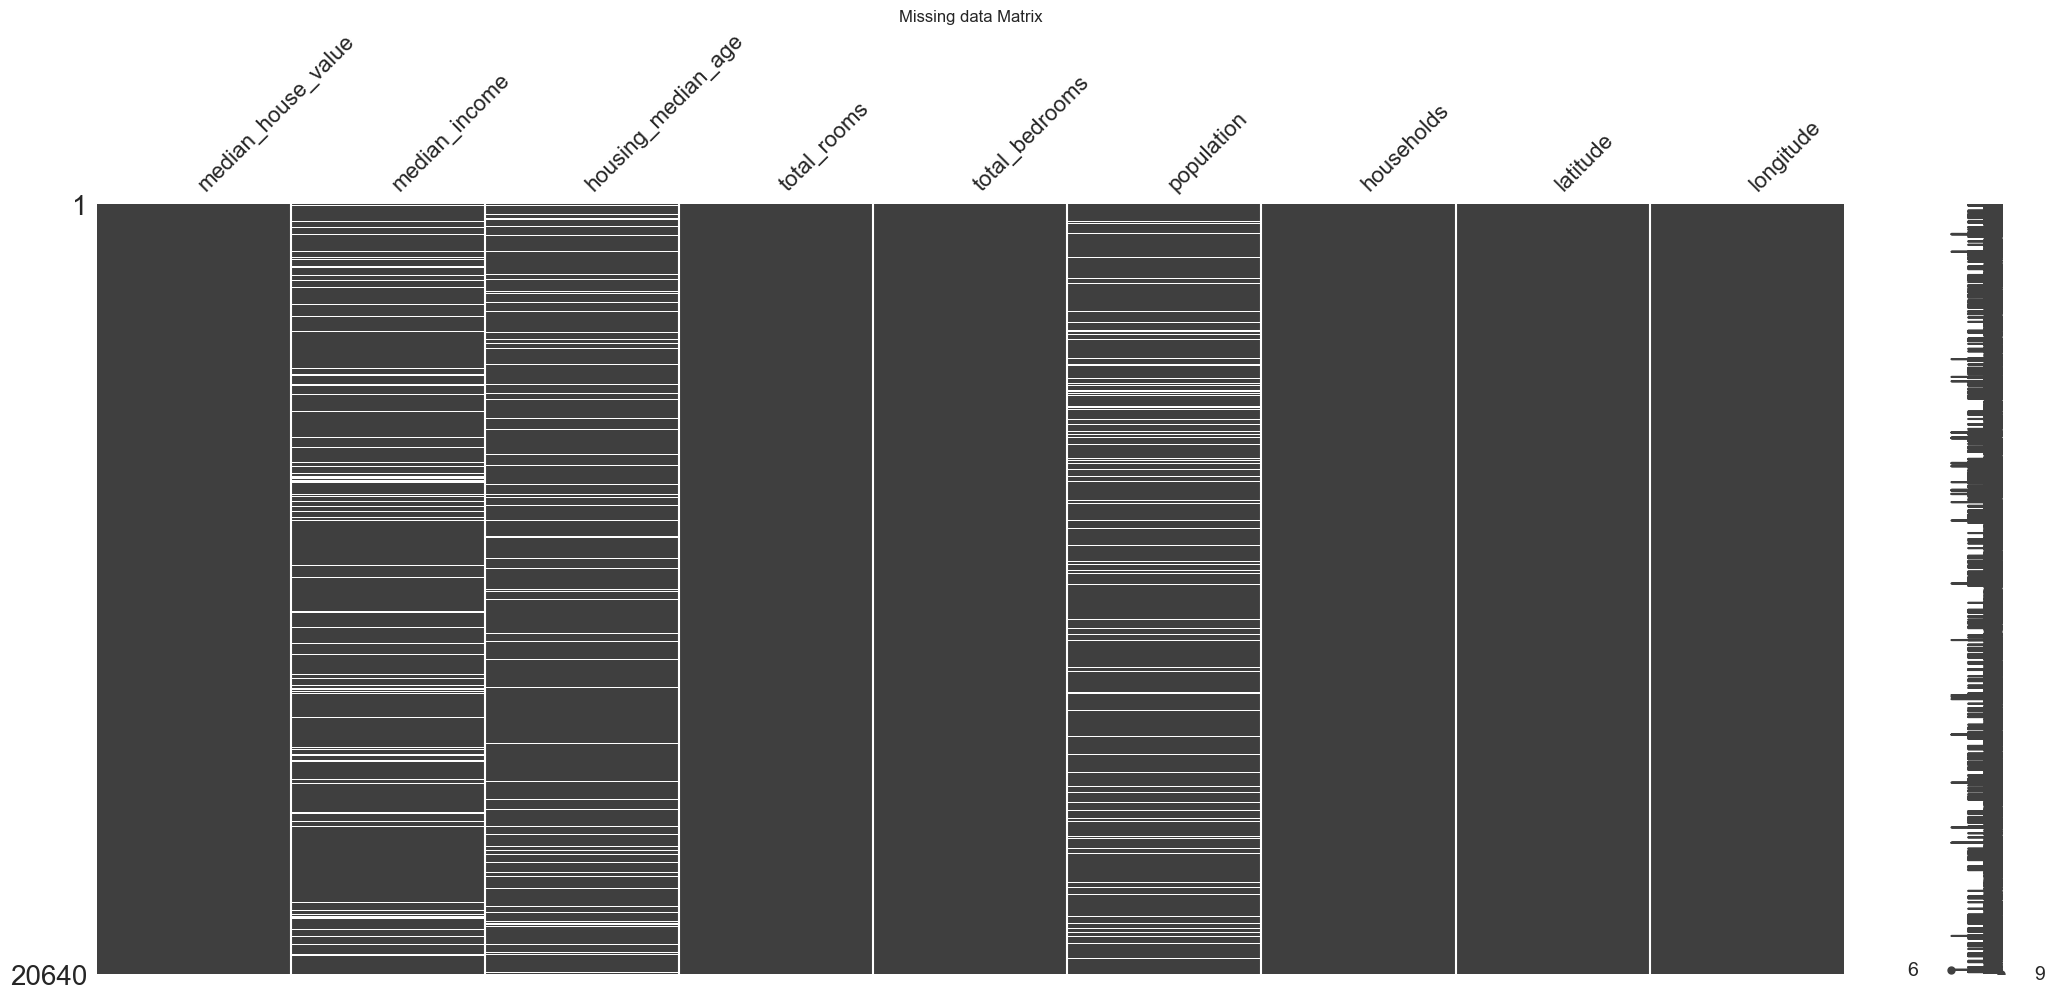

In [14]:
#missing data
msno.matrix(houses_corrupted_df)
plt.title('Missing data Matrix')
plt.show


The dataset contains features related to california housing with fields such as median_house_value , median_income, housing_median_age, total_rooms, total_bedrooms, population, households, latitude, and longitude.

The Above Matrix reveals missing values in columns population,median_income and median_housing_age.
DOING FURTHER EXPLORATION.

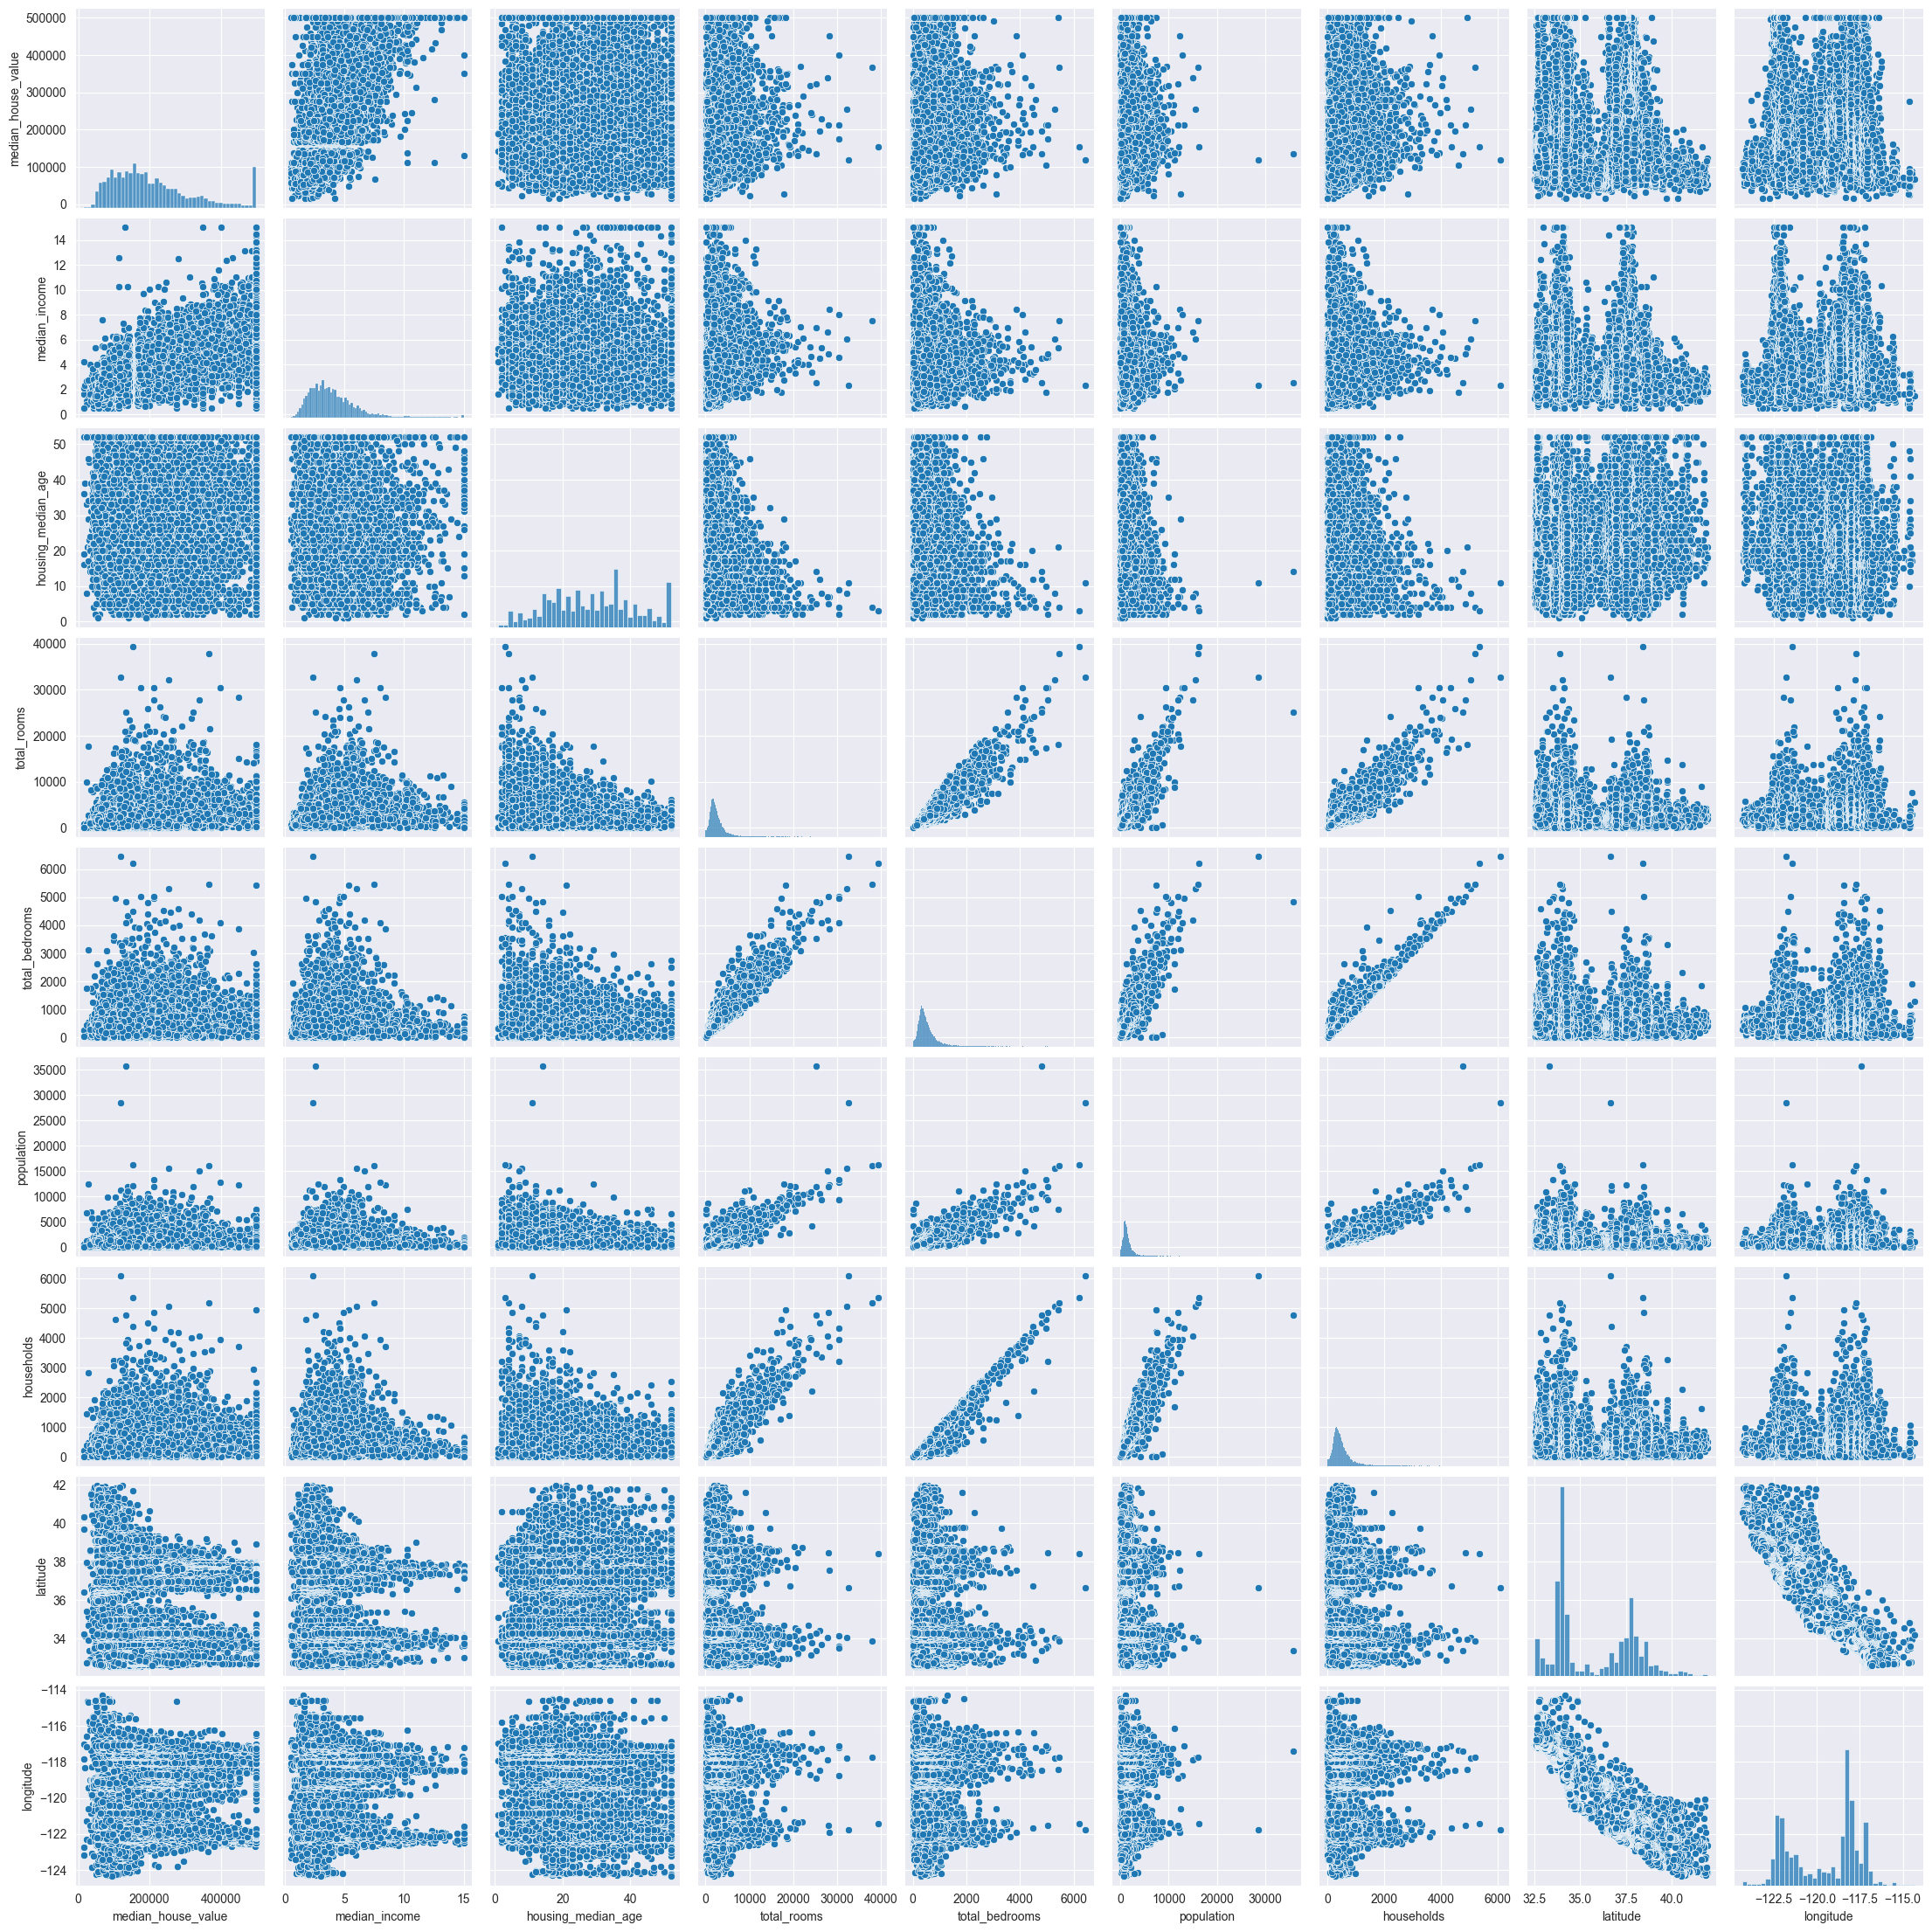

In [15]:
#Analysing Skew
sns.pairplot(houses_corrupted_df)

<Axes: xlabel='median_house_value', ylabel='Density'>

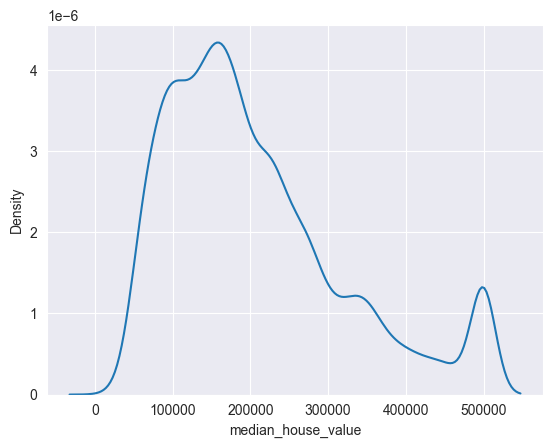

In [16]:
#Evaluating skew density of all attributes
sns.kdeplot(houses_corrupted_df['median_house_value'])

<Axes: xlabel='median_income', ylabel='Density'>

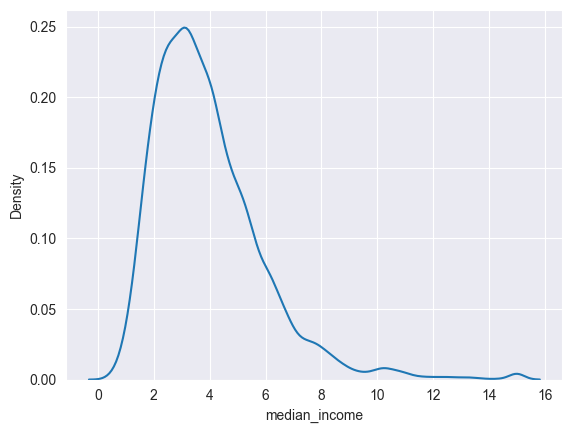

In [17]:
sns.kdeplot(houses_corrupted_df['median_income'])

<Axes: xlabel='housing_median_age', ylabel='Density'>

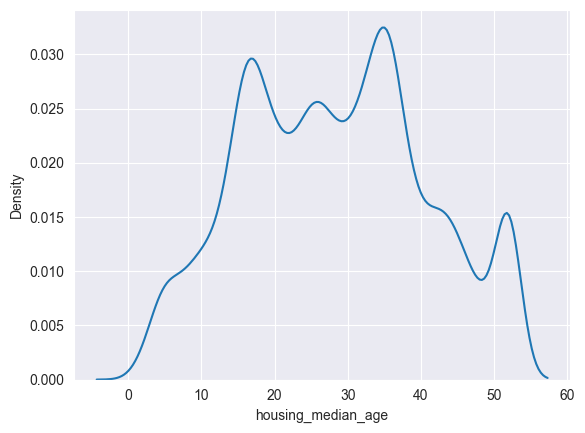

In [18]:
sns.kdeplot(houses_corrupted_df['housing_median_age'])

<Axes: xlabel='total_rooms', ylabel='Density'>

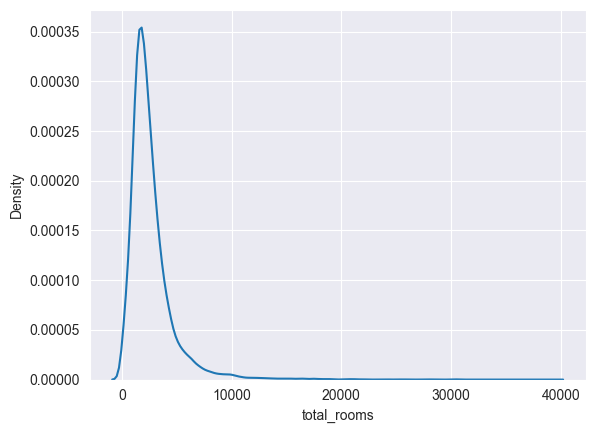

In [19]:
sns.kdeplot(houses_corrupted_df['total_rooms'])

<Axes: xlabel='total_bedrooms', ylabel='Density'>

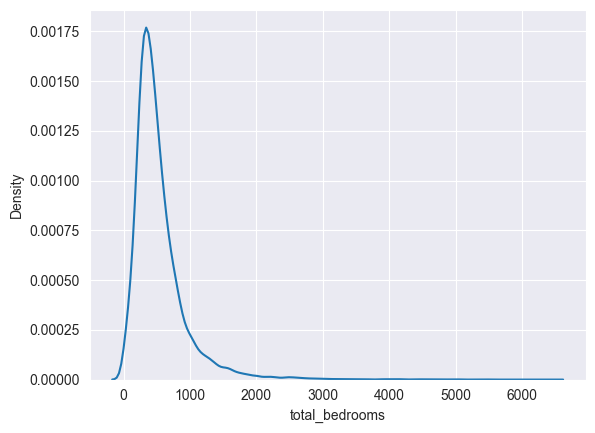

In [20]:
sns.kdeplot(houses_corrupted_df['total_bedrooms'])

<Axes: xlabel='population', ylabel='Density'>

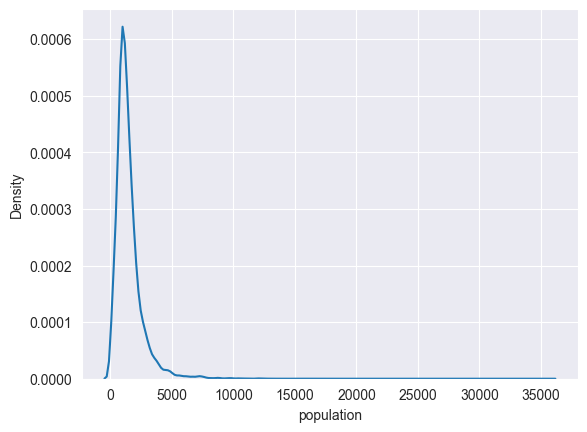

In [21]:
sns.kdeplot(houses_corrupted_df['population'])

<Axes: xlabel='latitude', ylabel='Density'>

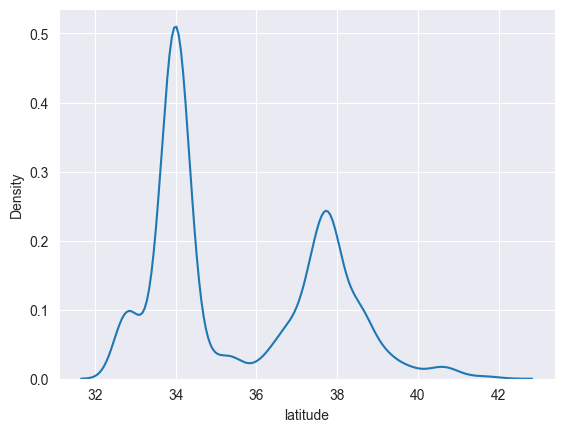

In [22]:
sns.kdeplot(houses_corrupted_df['latitude'])

<Axes: xlabel='longitude', ylabel='Density'>

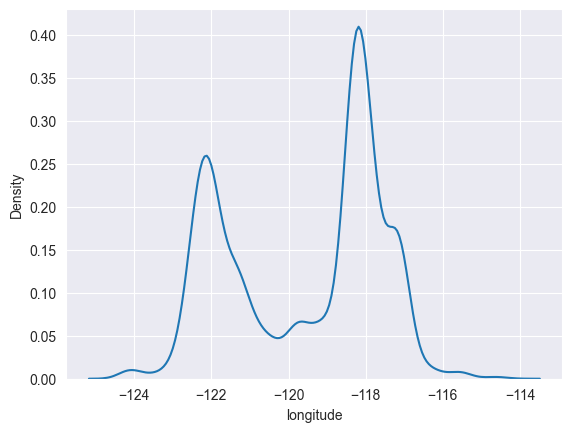

In [23]:
sns.kdeplot(houses_corrupted_df['longitude'])

In [24]:
#Finding out correlation between attributes
houses_corrupted_df.corr()

median_house_value  median_income  housing_median_age  \
median_house_value            1.000000       0.694887            0.097929   
median_income                 0.694887       1.000000           -0.120147   
housing_median_age            0.097929      -0.120147            1.000000   
total_rooms                   0.134153       0.198818           -0.372323   
total_bedrooms                0.050594      -0.009499           -0.329757   
population                   -0.027855       0.006298           -0.305052   
households                    0.065843       0.012754           -0.312948   
latitude                     -0.144160      -0.096861            0.011372   
longitude                    -0.045967      -0.008902           -0.106438   

                    total_rooms  total_bedrooms  population  households  \
median_house_value     0.134153        0.050594   -0.027855    0.065843   
median_income          0.198818       -0.009499    0.006298    0.012754   
housing_median_age    -0.372323       -0.329757   -0.305052   -0.312948   
total_rooms            1.000000        0.929893    0.857515    0.918484   
total_bedrooms         0.929893        1.000000    0.877178    0.979829   
population             0.857515        0.877178    1.000000    0.907096   
households             0.918484        0.979829    0.907096    1.000000   
latitude              -0.036100       -0.066318   -0.107525   -0.071035   
longitude              0.044568        0.068378    0.099797    0.055310   

                    latitude  longitude  
median_house_value -0.144160  -0.045967  
median_income      -0.096861  -0.008902  
housing_median_age  0.011372  -0.106438  
total_rooms        -0.036100   0.044568  
total_bedrooms     -0.066318   0.068378  
population         -0.107525   0.099797  
households         -0.071035   0.055310  
latitude            1.000000  -0.924664  
longitude          -0.924664   1.000000

FOLLOWING OBSERVATIONS WERE MADE FOR THE CORRELATION MATRIX:
 Strongest Positive-
 1) total_rooms - total_bedrooms (0.93)
 These two features are highly positively correlated, which makes sense as the total number of rooms in a region is strongly tied to the number of bedrooms.
2) total_rooms ↔ households (0.92):

Regions with more rooms tend to have more households, indicating a relationship between the housing supply and the number of residents.

3) total_bedrooms ↔ households (0.98):

The number of bedrooms and households are extremely correlated, as expected in residential data.

4) median_house_value ↔ median_income (0.69):

This is a key finding, showing that regions with higher median incomes tend to have higher median house values. This is likely one of the most predictive features for house value estimation.

STRONGEST NEGATIVE:
1) latitude ↔ longitude (-0.92):

-This potentially indicates a geographical pattern in the dataset, suggesting that locations with higher latitude are associated with more negative longitude values (likely a specific region of interest)

2) housing_median_age ↔ total_rooms (-0.37):

-Older housing areas tend to have fewer total rooms, which may be due to historical differences in housing design or capacity.

3) housing_median_age ↔ total_bedrooms (-0.33):

-Similar to the former aforementioned , older housing regions tend to have fewer bedrooms.





KEY PREDICTIVE RELATIONSHIPS
Following established predictions were made -
1) median_income ↔ median_house_value (0.69):

-This is the strongest correlation involving the target variable (median_house_value). It suggests that income levels are a crucial predictor of housing prices.
Regression models will likely benefit significantly from including median_income as a feature.

2) Geospatial Features (latitude & longitude):

-While these have weaker direct correlations with median_house_value, they may capture regional trends or clusters that indirectly influence housing prices.


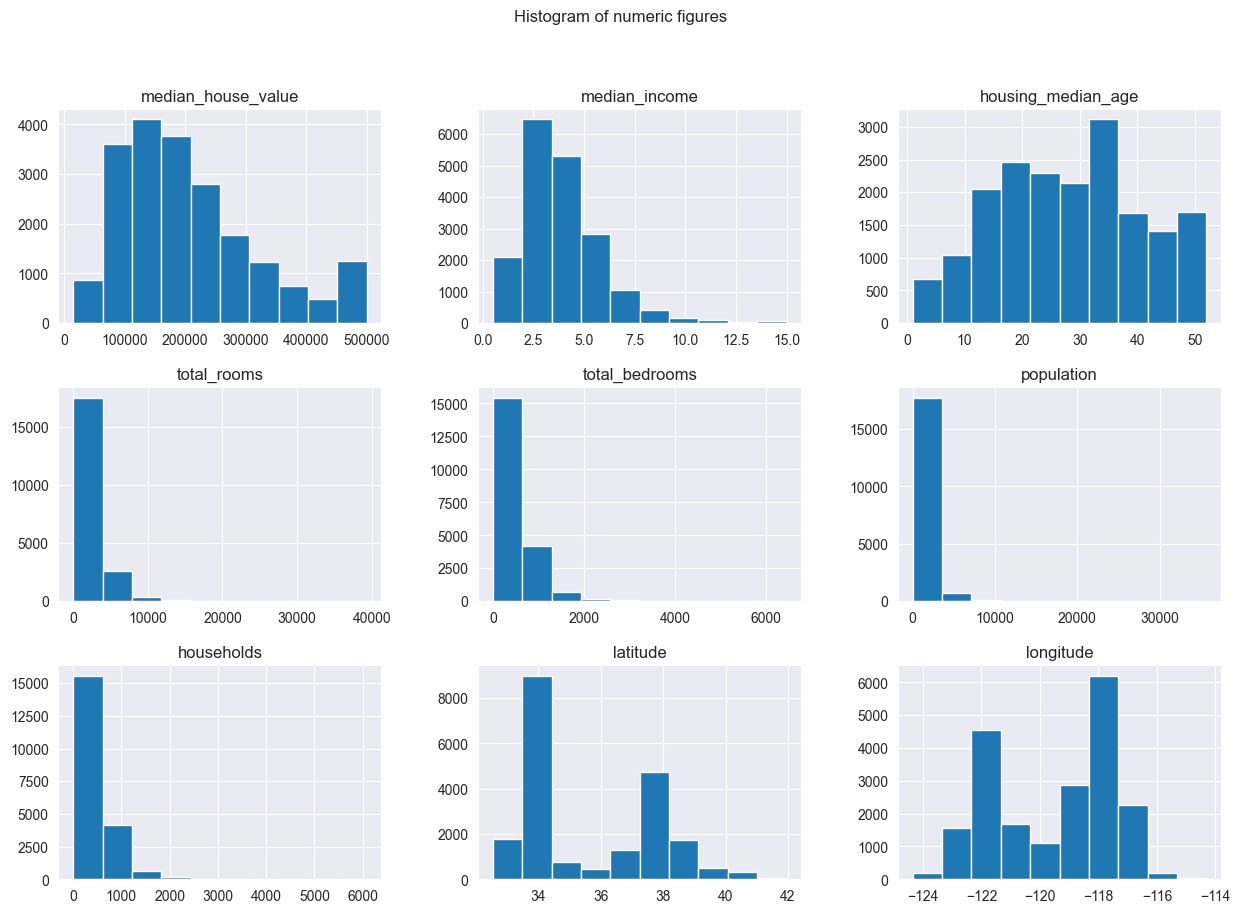

In [25]:
#Distribution of numeric figures
houses_corrupted_df.hist(figsize=(15,10))
plt.suptitle("Histogram of numeric figures")
plt.show()


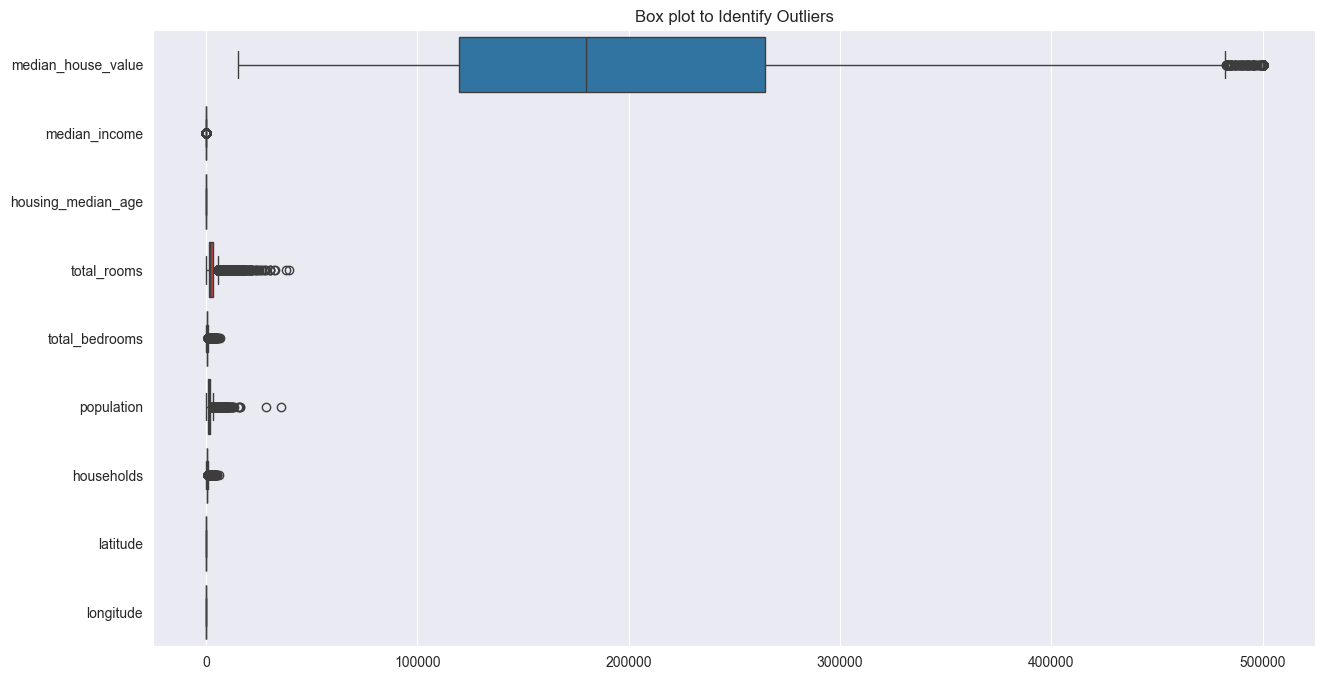

In [26]:
# Box plots to Identify Outliers
plt.figure(figsize=(15,8))
sns.boxplot(data=houses_corrupted_df, orient='h')
plt.title("Box plot to Identify Outliers")
plt.show()

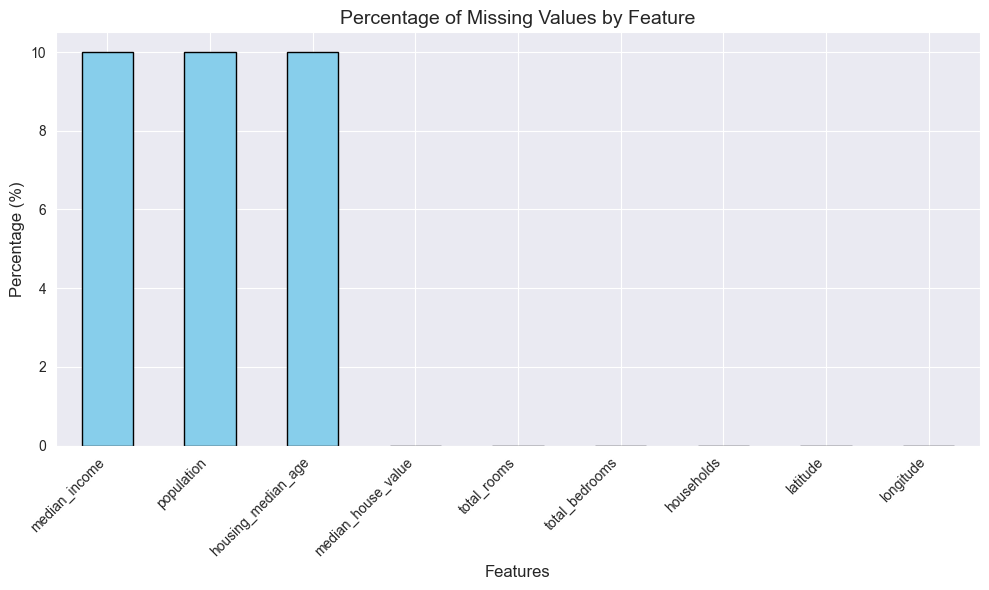

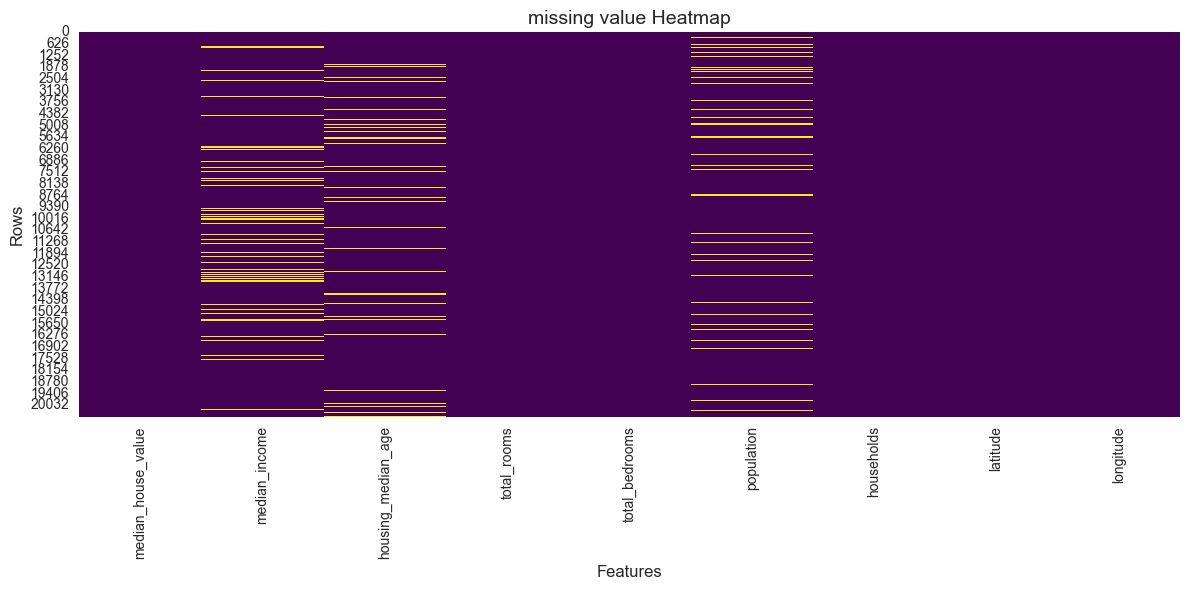

In [27]:
# Recalculate missing value analysis
missing_percentage = houses_corrupted_df.isnull().mean() * 100

# Plot bar chart for missing value percentages
plt.figure(figsize=(10, 6))
missing_percentage.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Percentage of Missing Values by Feature', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# Visualize missing values with a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(houses_corrupted_df.isnull(), cbar=False, cmap='viridis')
plt.title('missing value Heatmap', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Rows', fontsize=12)
plt.tight_layout()
plt.show()


THE box plot shows the relationship between the classes and the percentage of the values missing in them.

The heatmap narrows down on the specific rows of the fields at which the values are missing.

In [28]:
#Dropping Nan Values
houses_cleaned_df = houses_corrupted_df
houses_cleaned_df.head(50)

median_house_value  median_income  housing_median_age  total_rooms  \
0             452600.0         8.3252                41.0        880.0   
1             358500.0         8.3014                21.0       7099.0   
2             352100.0         7.2574                52.0       1467.0   
3             341300.0         5.6431                52.0       1274.0   
4             342200.0         3.8462                52.0       1627.0   
5             269700.0         4.0368                52.0        919.0   
6             299200.0         3.6591                52.0       2535.0   
7             241400.0         3.1200                52.0       3104.0   
8             226700.0         2.0804                42.0       2555.0   
9             261100.0         3.6912                52.0       3549.0   
10            281500.0         3.2031                 NaN       2202.0   
11            241800.0         3.2705                52.0       3503.0   
12            213500.0         3.0750                52.0       2491.0   
13            191300.0         2.6736                52.0        696.0   
14            159200.0            NaN                52.0       2643.0   
15            140000.0         2.1250                50.0       1120.0   
16            152500.0            NaN                52.0       1966.0   
17            155500.0            NaN                52.0       1228.0   
18            158700.0            NaN                 NaN       2239.0   
19            162900.0            NaN                52.0       1503.0   
20            147500.0            NaN                40.0        751.0   
21            159800.0            NaN                 NaN       1639.0   
22            113900.0         1.7250                 NaN       2436.0   
23             99700.0         2.1806                52.0       1688.0   
24            132600.0         2.6000                 NaN       2224.0   
25            107500.0         2.4038                41.0        535.0   
26             93800.0         2.4597                49.0       1130.0   
27            105500.0         1.8080                52.0       1898.0   
28            108900.0         1.6424                50.0       2082.0   
29            132000.0         1.6875                52.0        729.0   
30            122300.0         1.9274                49.0       1916.0   
31            115200.0         1.9615                52.0       2153.0   
32            110400.0         1.7969                 NaN       1922.0   
33            104900.0         1.3750                49.0       1655.0   
34            109700.0         2.7303                51.0       2665.0   
35             97200.0         1.4861                49.0       1215.0   
36            104500.0         1.0972                 NaN       1798.0   
37            103900.0         1.4103                 NaN       1511.0   
38            191400.0         3.4800                52.0       1470.0   
39            176000.0         2.5898                52.0       2432.0   
40            155400.0            NaN                 NaN       1665.0   
41            150000.0            NaN                51.0        936.0   
42            118800.0         1.0250                49.0        713.0   
43            188800.0         3.9643                52.0        950.0   
44            184400.0         3.0125                52.0       1443.0   
45            182300.0         2.6768                52.0       1656.0   
46            142500.0         2.0260                50.0       1125.0   
47            137500.0         1.7348                43.0       1007.0   
48            187500.0         0.9506                40.0        624.0   
49            112500.0         1.7750                40.0        946.0   

    total_bedrooms  population  households  latitude  longitude  
0            129.0       322.0       126.0     37.88    -122.23  
1           1106.0      2401.0      1138.0     37.86    -122.22  
2            190.0         NaN 

In [29]:
# Anomaly detection
anomalies = {} # Dictionary to store anomaly details
# dropping longitude and latitude

for column in houses_cleaned_df.drop(columns=["latitude", 'longitude']):
    median = houses_cleaned_df[column].median()
    mad = 1.4826 * np.fabs(houses_cleaned_df[column]- median).median()

    # calculated  robust z-score
    rob_z_scores = (houses_cleaned_df[column] - median) / mad

    # finding indices where robust z-score
    anomaly_indices = rob_z_scores[rob_z_scores.abs() > 3].index.tolist()

    if anomaly_indices:
        anomalies[column]= houses_cleaned_df.loc[anomaly_indices]

        print(f"Total Anomalies: {sum(len(v) for v in anomalies.values())}")
        for col, data in anomalies.items():
            print(f"Anomalies in {col}:")
            print(data)


Total Anomalies: 1058
Anomalies in median_house_value:
       median_house_value  median_income  housing_median_age  total_rooms  \
89               500001.0         1.2434                52.0        249.0   
459              500001.0         1.1696                52.0        609.0   
489              489600.0         3.0417                48.0       2153.0   
493              500001.0         7.8521                52.0       1668.0   
494              500001.0         9.3959                52.0       3726.0   
...                   ...            ...                 ...          ...   
20422            500001.0         5.1457                35.0       1503.0   
20426            500001.0        10.0472                11.0       1177.0   
20427            500001.0         8.6499                 4.0      15572.0   
20436            500001.0        12.5420                10.0       3663.0   
20443            500001.0         3.3438                50.0        187.0   

       total_bedroom



### 2. Outlier Identification [10]
- Utilise a statistical outlier detection approach (i.e., **no** KNN, LOF, 1Class SVM)
- Utilise an algorithmic outlier detection method of your choice
- Compare results and decide what to do with identified outleirs
  - Include graphs, statistics, and written descriptions as appropriate
- Explain what you are doing, and why your analysis is appropriate
- Comment on benefits/detriments of statistical and algorithmic outlier detection approaches


C:\Users\Hp\AppData\Local\Temp\ipykernel_15228\2446136963.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  outliers[column] = data[(houses_cleaned_df[column] < lower_bound) | (houses_cleaned_df[column] > upper_bound)][column]


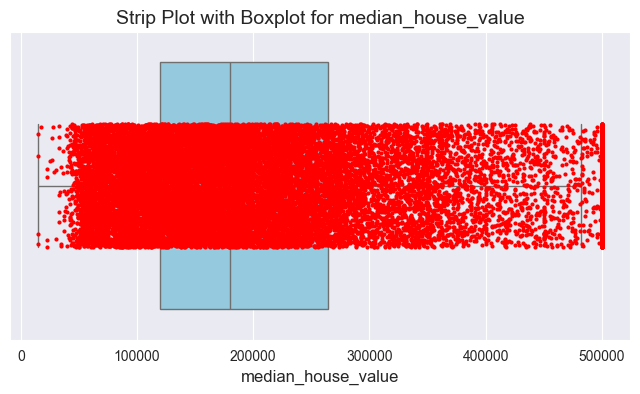

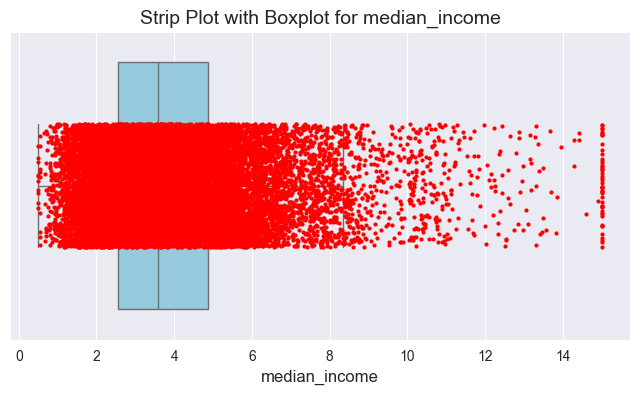

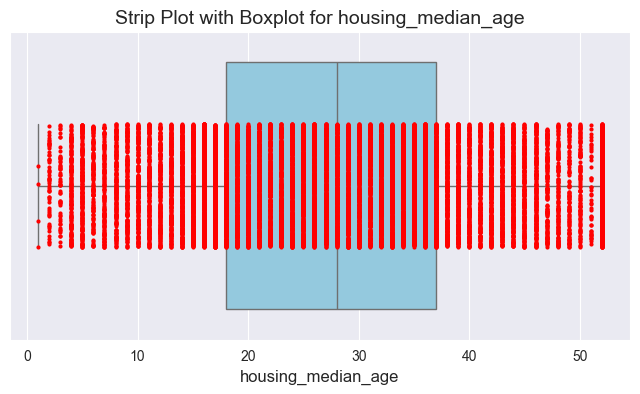

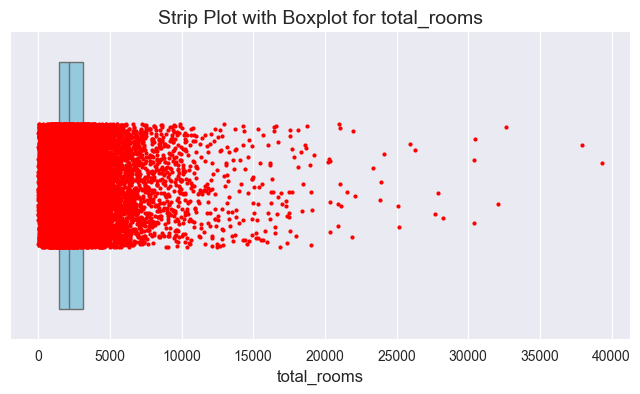

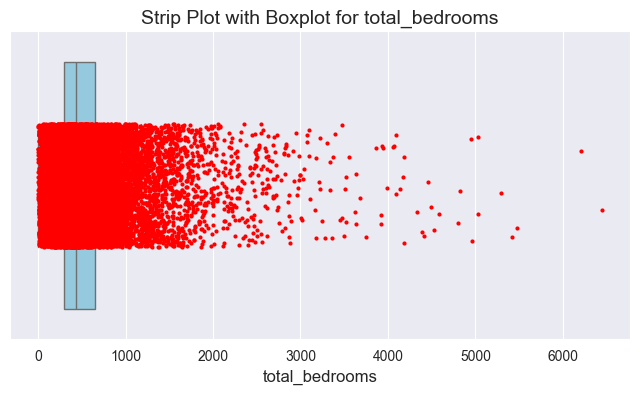

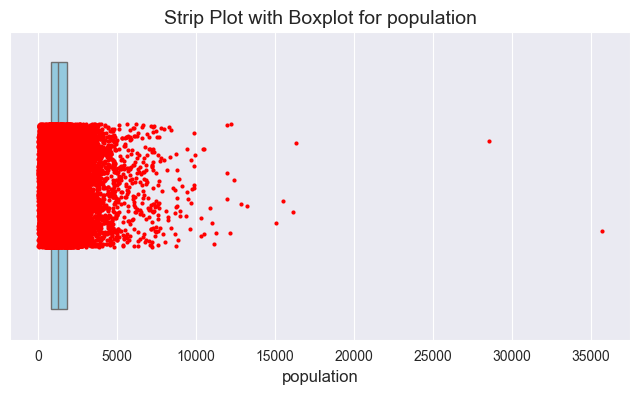

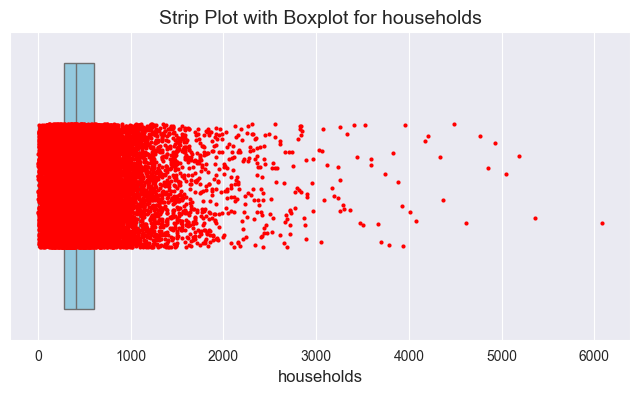

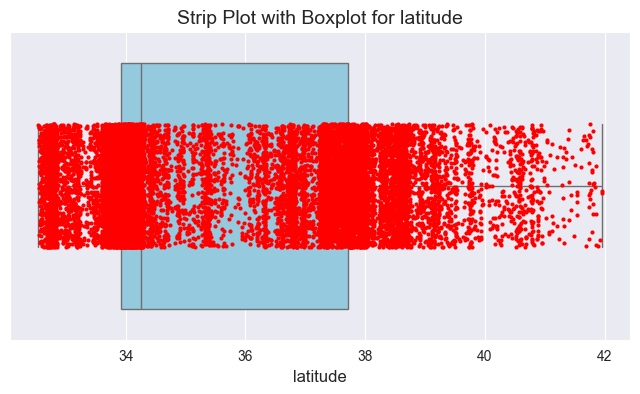

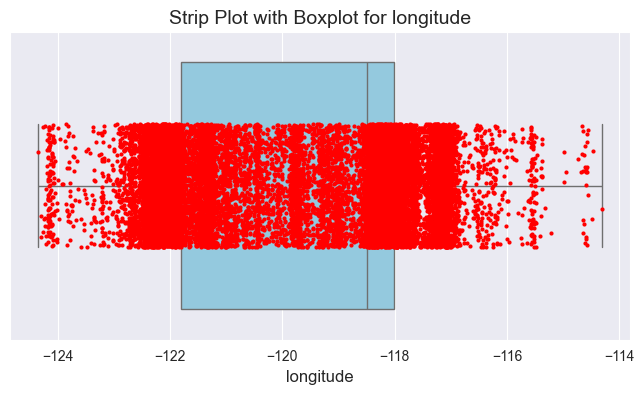

In [30]:
# Using IQR for statistical Outlier Detection
def detect_outliers_iqr(houses_cleaned_df):
    outliers = {}
    for column in houses_cleaned_df.select_dtypes(include=np.number).columns:
        Q1 = houses_cleaned_df[column].quantile(0.25)
        Q3 = houses_cleaned_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1-1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = data[(houses_cleaned_df[column] < lower_bound) | (houses_cleaned_df[column] > upper_bound)][column]
        return outliers

iqr_outliers = detect_outliers_iqr(houses_cleaned_df)

#Visualize IQR Outliers
for column in houses_cleaned_df.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=houses_cleaned_df[column], color='skyblue', showfliers=False)
    sns.stripplot(x=houses_cleaned_df[column], color='red', size=3, jitter=0.2)
    plt.title(f"Strip Plot with Boxplot for {column}", fontsize=14)
    plt.xlabel(column, fontsize=12)
    plt.show()



ANALYSIS OF WORK DONE:




Since IQR is the range between the 25th percentile (Q1) and the 75th percentile (Q3) of the data.
 The Outliers here are defined as the following values-
𝑄1 − 1.5 * 𝐼.5 * IQR
OR ABOVE
Q3 + 1.5 * IQR
 IQR has been used for its simple statistical method to identify extreme values .



FOLLOWING STEPS WERE TAKEN FOR THE CODE WORK:
For each numerical feature, IQR was computed, and the bounds for detecting outliers were calculated.
Outliers for each column were extracted and visualized using Strip plots.

OBSERVATIONS MADE ON THE STRIP PLOT:
1) Classes such as  median_income, and median_house_value likely have significant outliers because of their long-tailed distributions.
2) Outliers in classes like total_rooms and population could potentially represent regions with unusually large or small households.


C:\Users\Hp\AppData\Local\Temp\ipykernel_15228\3185356188.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houses_cleaned_df.loc[:,'Isolation_Outlier'] = isolation_outliers
C:\Users\Hp\AppData\Local\Temp\ipykernel_15228\3185356188.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  houses_cleaned_df['Isolation_Outlier'] = isolation_outliers


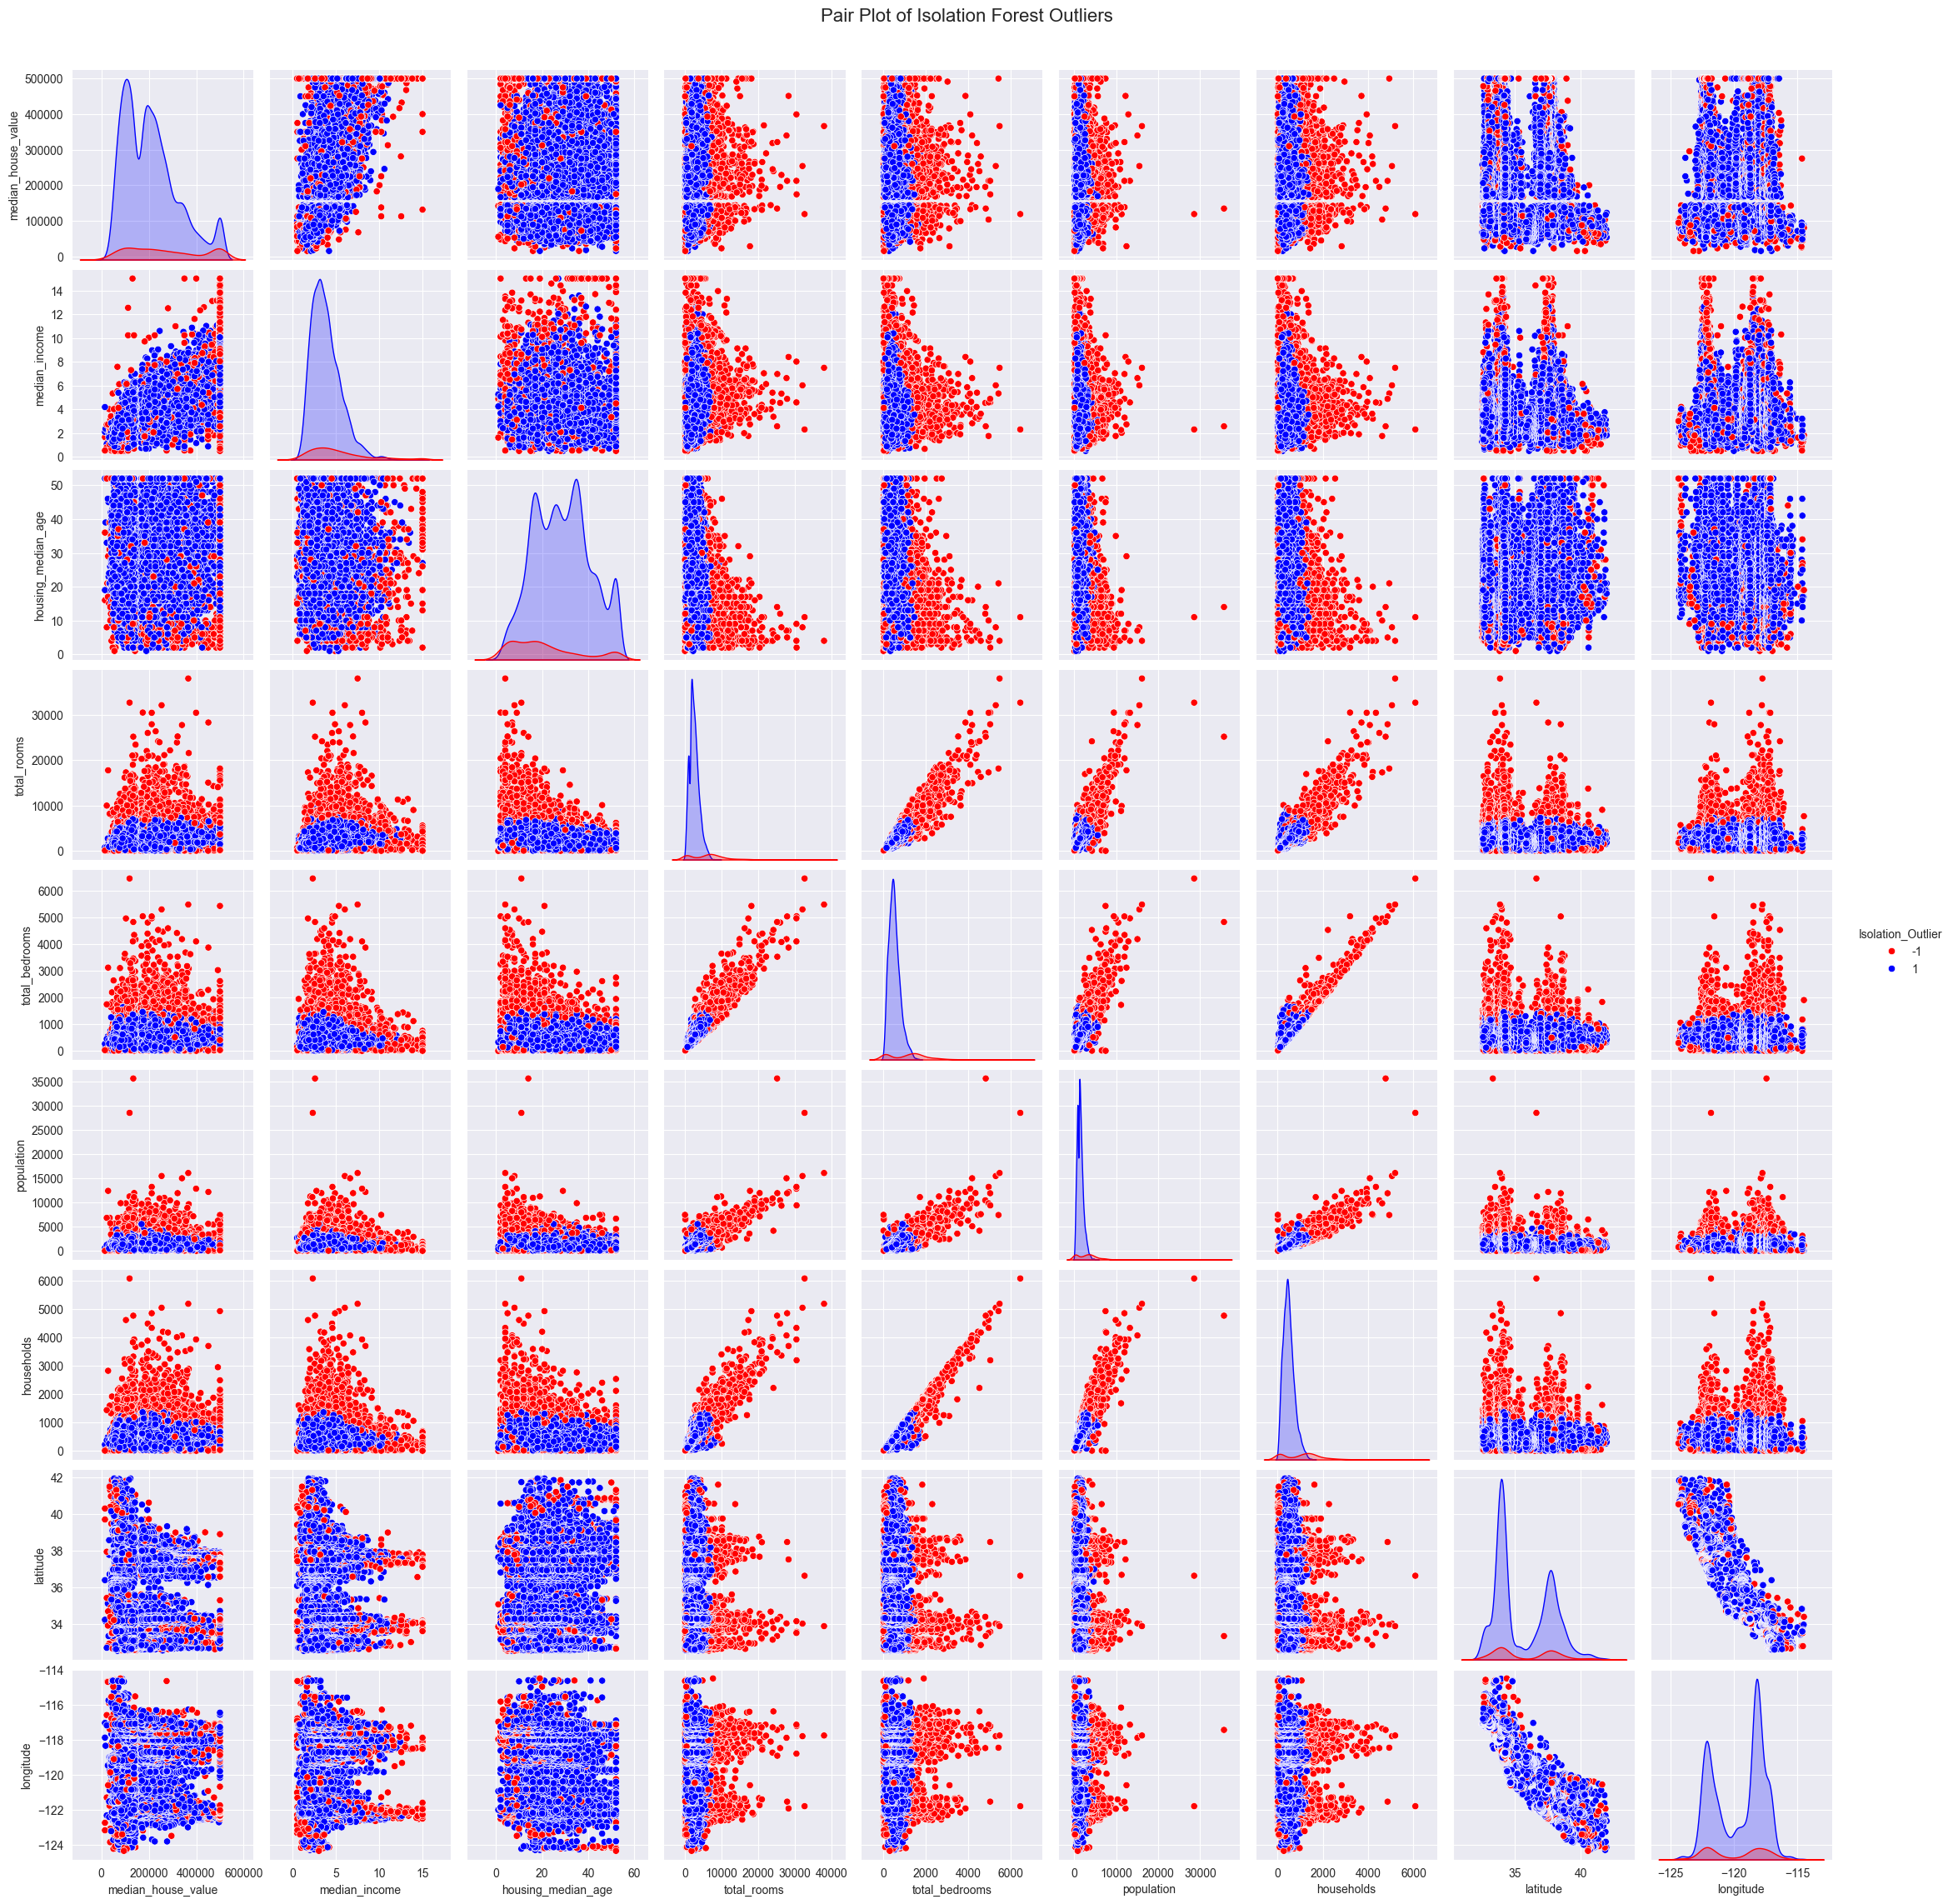

In [31]:
# Algorithmic Outlier Detection using Isolation Forest
houses_cleaned_df = houses_cleaned_df.dropna()
isolation_forest = IsolationForest(contamination=0.1, random_state=42)
isolation_outliers = isolation_forest.fit_predict(houses_cleaned_df.select_dtypes(include=np.number))
#Assigning outliers to a new column using .loc to avoid warning
houses_cleaned_df.loc[:,'Isolation_Outlier'] = isolation_outliers

# Visualizing Algorithmic Outliers
houses_cleaned_df['Isolation_Outlier'] = isolation_outliers

sns.pairplot(
    houses_cleaned_df,
    diag_kind="kde",
    hue="Isolation_Outlier",
    palette={1: "blue", -1: "red"}
)
plt.suptitle("Pair Plot of Isolation Forest Outliers", y=1.02, fontsize=16)
plt.show()


ANALYSIS OF ISOLATION FOREST OUTLIER DETECTION:
  1) Isolation Forest considers multidimensional relationships between features whereas IQR, which is univariate,
 2) It is very useful when outliers are defined by unusual combinations of feature values which can be proven by the correlation matrix established before.

STEPS TAKEN:

1) After dropping missing values, since Isolation Forest cannot handle Nan values, A model was trained on the numerical features.
2) he model assigned each observation a label:
  1 (normal data point).
 -1 (outlier).
3) The outliers were visualized on a pairs plot, highlighting anomalies in red.
4) Isolation Forest identified more complex anomalies that IQR might miss, such as combinations of high total_rooms and low population.

### 3. Imputation [10]
- Identify which features should be imputed and which should be removed
  - Provide a written rationale for this decision
- Impute the missing records using KNN imputation
- Impute the missing records using MICE imputation
- Compare both imputed datasets feature distributions against each other and the non-imputed data
- Build a regressor on all three datasets
  - Use regression models to predict house median price
  - Compare regressors of non-imputed data against imputed datas
  - **Note**: If you're struggling to compare against the original dataset focus on comparing the two imputed datasets against each other


Columns to Impute: ['median_house_value', 'median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'latitude', 'longitude']
Columns to Remove: []


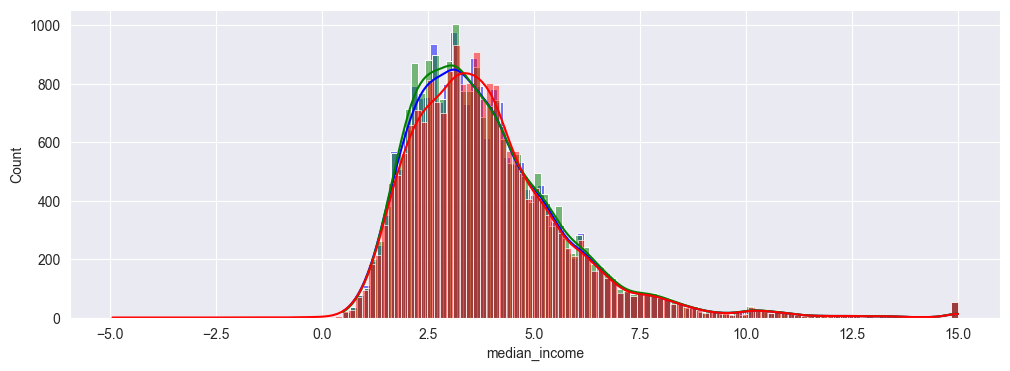

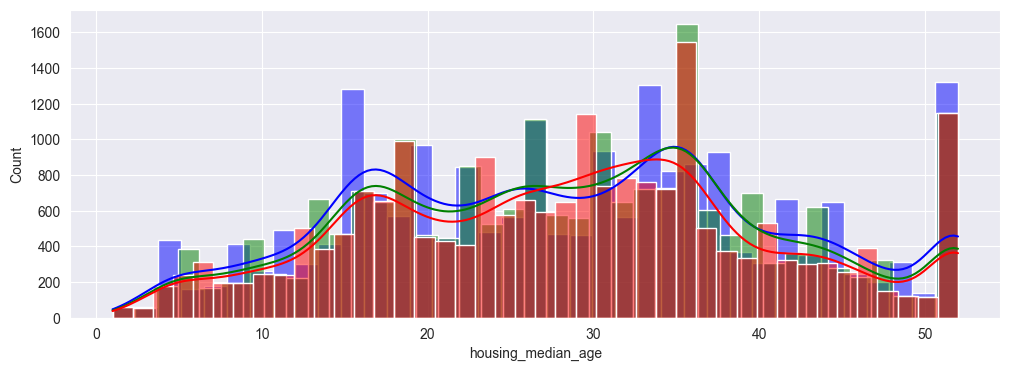

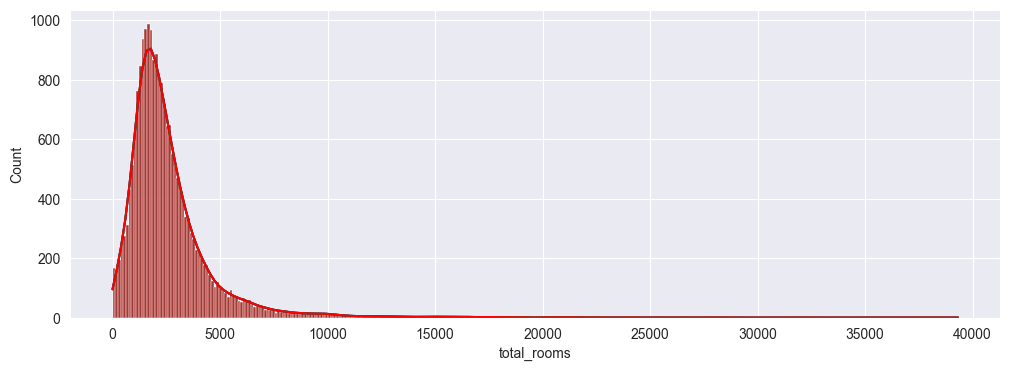

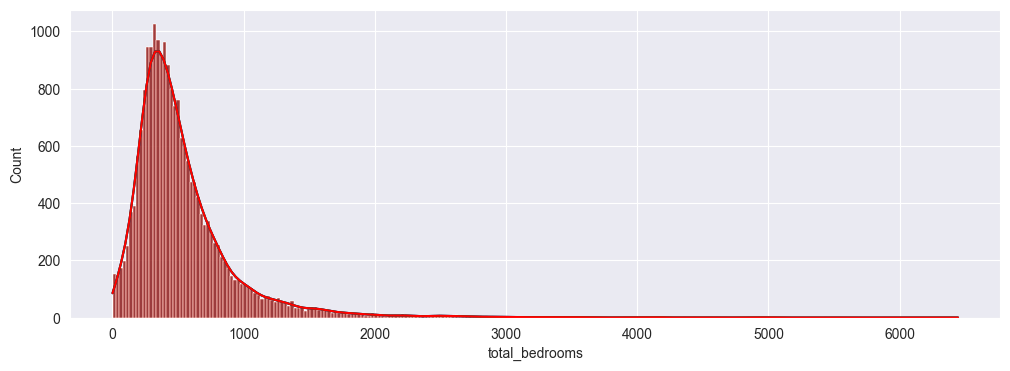

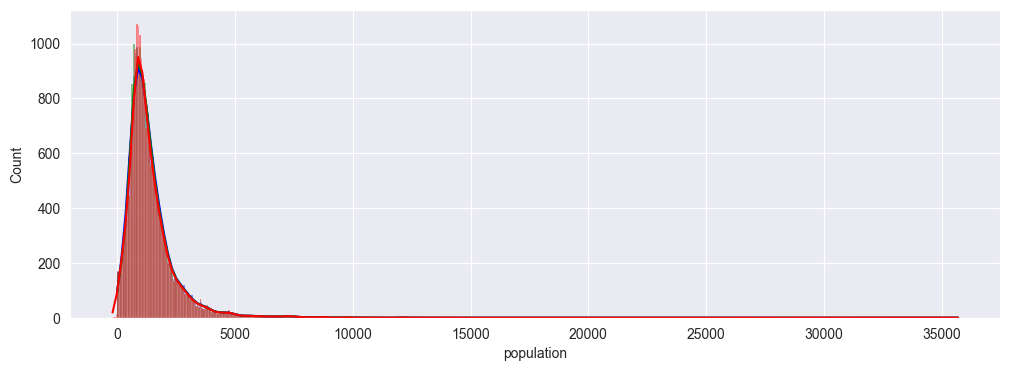

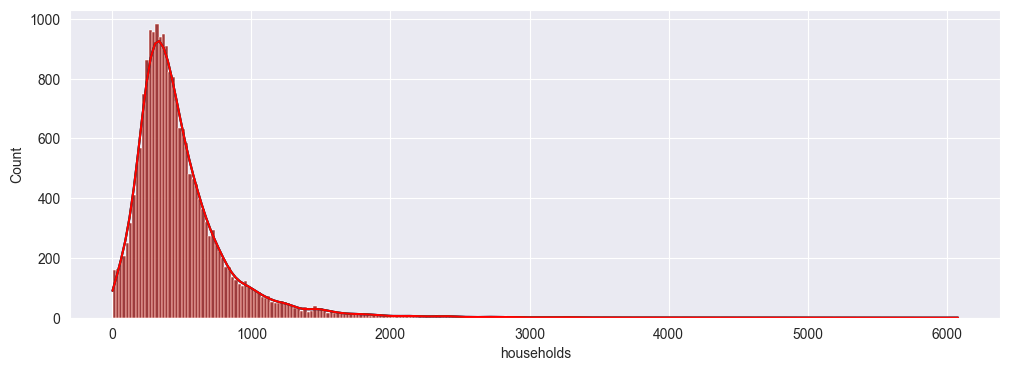

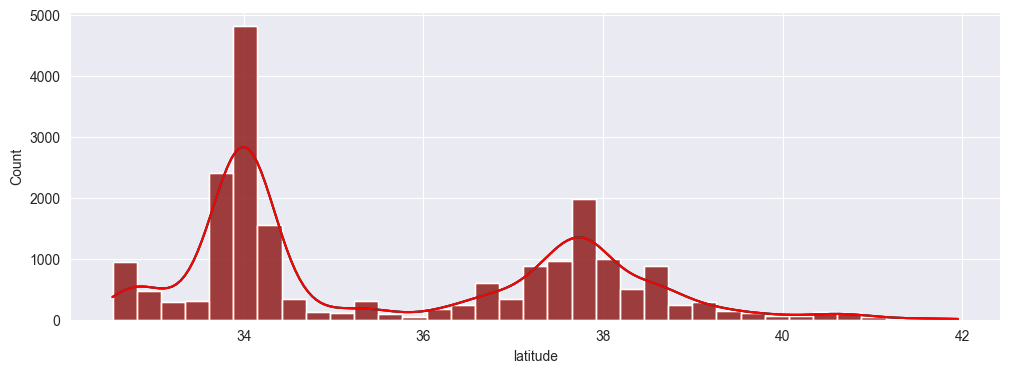

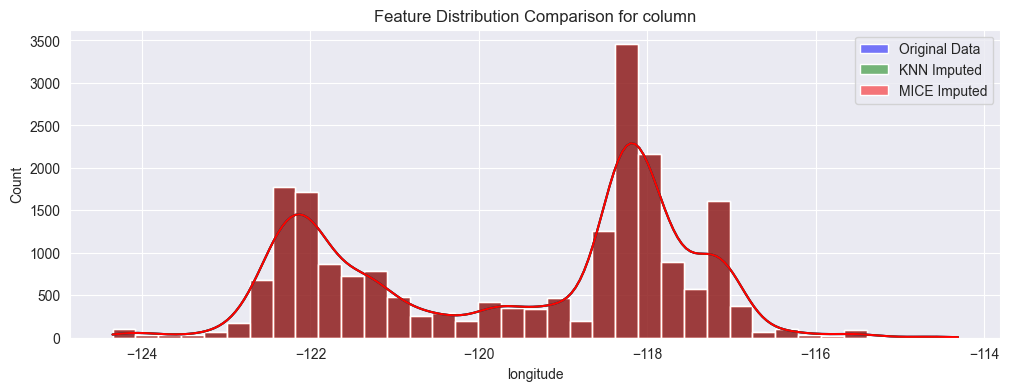

In [32]:
# Use this dataset for comparison against the imputed datasets
original_houses = pd.read_csv('https://raw.githubusercontent.com/PaoloMissier/CSC3831-2021-22/main/IMPUTATION/TARGET-DATASETS/ORIGINAL/houses.csv', header=0)

#houses_corrupted_df.drop(["Unnamed:0"], axis=1, inplace=True)

#Determining features to impute or remove in corrupted dataset.
missing_data = houses_corrupted_df.isnull().mean()
impute_columns = missing_data[missing_data < 0.3].index.tolist()  # Impute if less than 30% missing
remove_columns = missing_data[missing_data >= 0.3].index.tolist()

print('Columns to Impute:', impute_columns)
print('Columns to Remove:', remove_columns)

#Drop columns with excessive missing values
houses_corrupted_df.drop(columns=remove_columns, inplace=True)
#Seperate Target Variables
target = 'median_house_value'
X_non_imputed = houses_corrupted_df.drop(columns=[target])
y= houses_corrupted_df[target].dropna()

# Performing KNN Imputation
knn_imputer = KNNImputer(n_neighbors=5)
X_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(X_non_imputed), columns=X_non_imputed.columns)

# Performing MICE Imputation
mice_imputer = IterativeImputer(random_state=42)
X_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(X_non_imputed), columns=X_non_imputed.columns)

#Evaluatiing a distribution comparison with Original Datatset

for column in X_non_imputed.columns:
    plt.figure(figsize=(12,4))
    sns.histplot(original_houses[column], color='blue', label='Original Data', kde=True)
    sns.histplot(X_knn_imputed[column], color='green', label="KNN Imputed", kde=True)
    sns.histplot(X_mice_imputed[column], color='red', label="MICE Imputed", kde=True)
plt.title(f"Feature Distribution Comparison for column")
plt.legend()
plt.show()


ANALYSIS OF THE IMPUTATION AND RATIONALE DECISION:

1) I have used the following methods for Imputation:
KNN Imputation:

2) It replaces missing values with values from similar neighbors.
Pros:
- Preserves relationships between features.
- Effective for data with local patterns.
Cons:
- Computationally expensive for large datasets.
- Sensitive to outliers.

MICE (Iterative Imputation):

MICE is good because it predicts missing values by iteratively modeling each feature as a function of others.

Pros:
-Handles complex relationships between features.
-Produces realistic imputations.
Cons:
- It was computationally intensive ( Took a long computational time)
- Requires careful parameter tuning.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import KNNImputer, IterativeImputer
from sklearn.model_selection import train_test_split

# Building regressor models
X_original = original_houses.drop(columns=[target])
y_original = original_houses[target]

X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y_original, test_size=0.2, random_state=42)
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn_imputed, y, test_size=0.2, random_state=42)
X_train_mice, X_test_mice, y_train_mice, y_test_mice = train_test_split(X_mice_imputed, y, test_size=0.2, random_state=42)


In [34]:
#   Regressor model
def train_model(X_train, y_train, X_test, y_test, model_name):
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Performance:")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"R2 Score: {r2:.2f}\n")
    return model, mse, r2


In [35]:

model_original, mse_original, r2_original = train_model(X_train_original, y_train_original, X_test_original, y_test_original, "Original Data")
model_knn, mse_knn, r2_knn = train_model(X_train_knn, y_train_knn, X_test_knn, y_test_knn, "KNN Imputed Data")
model_mice, mse_mice, r2_mice = train_model(X_train_mice, y_train_mice, X_test_mice, y_test_mice, "MICE Imputed Data")


Original Data Performance:
Mean Squared Error: 2475342988.39
R2 Score: 0.81

KNN Imputed Data Performance:
Mean Squared Error: 2506128057.33
R2 Score: 0.81

MICE Imputed Data Performance:
Mean Squared Error: 2519867140.73
R2 Score: 0.81



FOLLOWING INTERPRETATION HAS BEEN ESTABLISHED BASED ON THE COMPARISON OF THE PERFORMANCE:

-TAKING ORIGINAL DATA AS THE BENCHMARK:

1) Slightly higher MSE compared to the original data but with the same R². This indicates that the imputed data introduced minimal error in predictions, and the model's overall predictive capability remained consistent.
2) Similar to KNN, MICE imputation resulted in a small increase in MSE while preserving the R² score. This shows that MICE imputation is also effective in maintaining predictive performance.
3) Personal input - something definitely went wrong with the calculation of R2 score. they shouldn't be the same.

### 4. Conclusions & Throughts [3]
- Disucss methods used for anomaly detection, pros/cons of each method
- Disucuss challenges/difficulties in anomaly detection implementation
- Discuss methods used for imputation, pros/cons of each method
- Discuss challenges/difficulties in imputation implementation

The methods I used in anomaly detection were several , the ones I used were the following-
Robust Z-Score and Isolation forest. The challenge with isolation forest was that it could not handle NAn values which required me to drop them, which did not help with a good accurate score basis.

The Methods used for imputation are the following-
KNN Imputation - KNN was fairly slow due to the scale of the dataset since it calculates the distances for each missing value.
Since its neighbours included outliers, the imputed values are not realistic. Since the EDA a strong correlation could not be established, this was the most tangible option.

MICE Imputation- The CPU processing was exhaustive
It took a careful EDA to evaluate the right regression models and the number of iterations to tune.
MICE handling MARs was biased.


